In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import gravhydro as gh
from gravhydro import propertyGradients, propertyGradient_i, densities, density_i

# Test Data

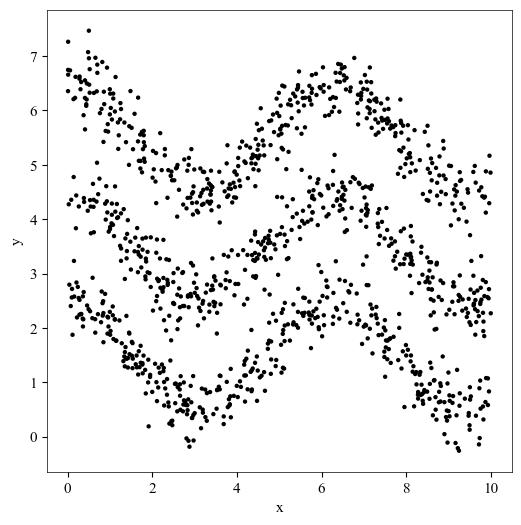

In [2]:
# Positions
dy = 1.0
lim = 1.0
lim0 = 1.0
y = np.array([])
npts = 400
nsteps = 3
total_N = npts * nsteps
for i in range(nsteps):
    new_y = np.random.normal(lim + dy/2, dy/3, npts)# np.random.uniform(lim, lim + dr, 200)
    lim += dy*2
    y = np.append(y, new_y)
x_ls = np.random.uniform(0, 10, total_N)
y_ls = y + np.cos(x_ls)
pos = np.array([x_ls, y_ls]).T

# Masses
masses = np.ones(pos.shape[0])*10


# Plot
plt.figure(figsize=(6, 6))
plt.scatter(pos[:, 0], pos[:, 1], s=masses)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Computing Gradient Fields

In [3]:
h = 0.5

## Density gradient

In [4]:
rhos = densities(pos, masses, h)

(array([ 17.,  49.,  78.,  95., 196., 242., 205., 189.,  86.,  43.]),
 array([ 60.27756785, 120.97526906, 181.67297027, 242.37067148,
        303.06837268, 363.76607389, 424.4637751 , 485.16147631,
        545.85917752, 606.55687873, 667.25457993]),
 <BarContainer object of 10 artists>)

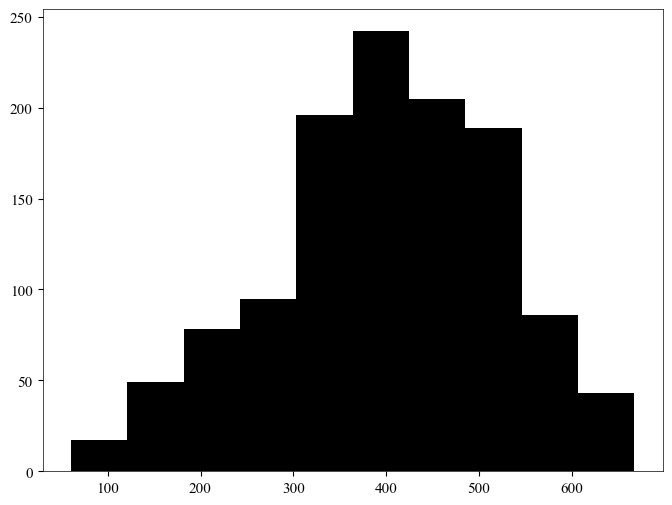

In [5]:
plt.hist(rhos)

In [6]:
# grid_sz = 20
# density_grad_grid = np.zeros((grid_sz, grid_sz, pos.shape[-1]))
# og_pt =  np.zeros((grid_sz, grid_sz, pos.shape[-1]))
# xgrid = np.linspace(0, 10, grid_sz)
# ygrid = np.linspace(0, 7, grid_sz)
# for i, x in enumerate(xgrid):
#     for j, y in enumerate(ygrid):
#         og_pt[i, j] = np.array([x, y])
#         density_grad_grid[i, j] = propertyGradient_i(og_pt[i, j], pos, masses, rhos, masses, h=0.5)

# plt.figure(figsize=(6,6))
# plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 300)

# plt.title('$\\nabla \\rho$', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)

Text(0, 0.5, 'y')

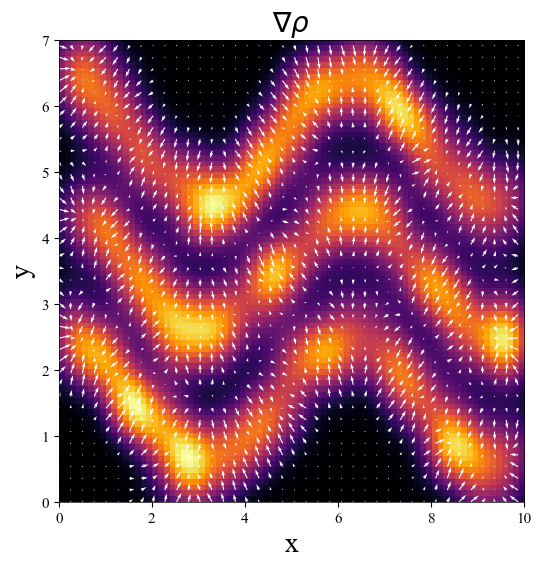

In [7]:
grid_sz = 80
density_grid = np.zeros((grid_sz, grid_sz))
density_grad_grid = np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
og_pt =  np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        density_grid[i, j] = density_i(np.array([x, y]), pos, masses, h=0.55)
        if i % 2 == 0 and j % 2 == 0:
            og_pt[int(i/2), int(j/2)] = np.array([x, y])
            density_grad_grid[int(i/2), int(j/2)] = propertyGradient_i(np.array([x, y]), pos, masses, rhos, masses, h=0.5)
plt.figure(figsize=(6,6))
plt.imshow(density_grid.T, extent=(xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()), origin='lower', aspect='auto', cmap='inferno')
plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 500, color='w')
plt.title('$\\nabla \\rho$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)